<a href="https://colab.research.google.com/github/audreymoreira/case_ENEM_2017/blob/main/Vistas_do_ENEM_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ENEM 2017 - ANÁLISE DOS MICRODADOS E ALGUMAS RELAÇÕES INTERESSANTES
### Audrey Moreira

Imports

In [96]:
import dask
import dask.dataframe as dd
import zipfile
import matplotlib

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

### Começo do tratamento: A aquisição do arquivo de dados no processo que nos permite analisar seu conteúdo. O arquivo tem um pouco mais de 3GB.
### Fiz upload do arquivo .zip, escolhi as colunas que permitem uma análise inicial para reduzir a carga na memória.  

In [97]:
with zipfile.ZipFile('/content/drive/MyDrive/COLAB_DADOS/MICRODADOS_ENEM_2017.zip') as z:
    print(*z.namelist(),sep="\n")

MICRODADOS_ENEM_2017.csv


In [98]:
colunas =['TP_ESCOLA', 'NO_MUNICIPIO_ESC', 'NO_MUNICIPIO_PROVA', 'SG_UF_ESC',
          'TP_PRESENCA_CH', 'TP_PRESENCA_CN', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
          'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO',
          'Q001', 'Q002', 'Q006', 'Q025']

dtype={'TP_ESCOLA': 'category',
       'NO_MUNICIPIO_ESC': 'category',
       'NO_MUNICIPIO_PROVA': 'category',
       'SG_UF_ESC': 'category',
       'TP_PRESENCA_CH': 'category',
       'TP_PRESENCA_CN': 'category',
       'TP_PRESENCA_LC': 'category',
       'TP_PRESENCA_MT': 'category',
       'NU_NOTA_CH': 'float16',
       'NU_NOTA_CN': 'float16',
       'NU_NOTA_LC': 'float16',
       'NU_NOTA_MT': 'float16',
       'NU_NOTA_REDACAO': 'float16',
       'Q001': 'category',
       'Q002': 'category',
       'Q006': 'category',
       'Q025': 'category'}

In [99]:
with zipfile.ZipFile('/content/drive/MyDrive/COLAB_DADOS/MICRODADOS_ENEM_2017.zip') as z:
    with z.open('MICRODADOS_ENEM_2017.csv') as f:
        enem_2017 = pd.read_csv(f,sep=';',encoding='ISO-8859-1',usecols=colunas,dtype=dtype)


### Este é o principal arquivo de dados: Este dataframe tem esta dimensão:

In [100]:
enem_2017.shape

(6731278, 17)

# Escolhi 4 questões do Questionário Sócio-Econômico: 2 sobre a educação/formação dos pais, a renda mensal da família e ter internet em casa. 
# Calculando a porcentagem de estudantes que respondeu as questões escolhidas do Questionário Sócio-Econômico:

In [101]:
enem_2017.isnull().sum()

TP_ESCOLA                   0
NO_MUNICIPIO_ESC      4945397
SG_UF_ESC             4945397
NO_MUNICIPIO_PROVA          0
TP_PRESENCA_CN            227
TP_PRESENCA_CH            227
TP_PRESENCA_LC            227
TP_PRESENCA_MT            227
NU_NOTA_CN            2293781
NU_NOTA_CH            2029913
NU_NOTA_LC            2029913
NU_NOTA_MT            2293781
NU_NOTA_REDACAO       2029913
Q001                        0
Q002                        0
Q006                        1
Q025                        1
dtype: int64

## As quatro questões escolhidas Q001, Q002, Q006 e Q25 foram respondidas por quase todos os estudantes, exceto 1. Portanto as respostas, se honestas, serão significativas.

In [104]:
p_questoes = round(((len(enem_2017)-1) / len(enem_2017)) * 100, 2)

In [105]:
p_questoes

100.0

# Cálculo da NOTA FINAL: é a média aritmética das notas em Ciências Naturais, Ciências Humanas, Linguagem e Códigos, Matemática e Redação.

In [110]:
enem_2017['NOTA_FINAL'] = (enem_2017['NU_NOTA_CN'] + enem_2017['NU_NOTA_CH'] + enem_2017['NU_NOTA_LC'] + enem_2017['NU_NOTA_MT'] + enem_2017['NU_NOTA_REDACAO']) / 5

In [111]:
enem_2017.tail()

,TP_ESCOLA,NO_MUNICIPIO_ESC,SG_UF_ESC,NO_MUNICIPIO_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q025,NOTA_FINAL
6731273,3,São Paulo,SP,São Paulo,1,1,1,1,520.00,571.00,558.5,578.00,680.0,G,E,O,B,581.50
6731274,1,NaN,NaN,Jaraguá,0,0,0,0,NaN,NaN,NaN,NaN,NaN,A,A,B,A,NaN
6731275,2,Rio de Janeiro,RJ,Rio de Janeiro,1,1,1,1,461.25,424.25,431.5,407.50,540.0,A,A,B,B,452.75
6731276,1,NaN,NaN,Contagem,1,1,1,1,541.00,587.00,528.5,479.25,0.0,B,B,D,A,427.25
6731277,3,Rio de Janeiro,RJ,Rio de Janeiro,1,1,1,1,502.75,609.50,558.0,838.50,600.0,F,F,O,B,621.50


# A maior NOTA FINAL no ENEM 2017 foi:

In [137]:
nota_maxima = enem_2017['NOTA_FINAL'].max()
nota_maxima

855.0

# E foi obtida por um estudante com estes dados:

In [138]:
enem_2017.loc[enem_2017['NOTA_FINAL'] == nota_maxima]

,TP_ESCOLA,NO_MUNICIPIO_ESC,SG_UF_ESC,NO_MUNICIPIO_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q025,NOTA_FINAL
668502,3,Curitiba,PR,São José dos Pinhais,1,1,1,1,853.0,831.5,724.0,927.5,940.0,G,G,Q,B,855.0


In [115]:
# enem_2017 = enem_2017.drop(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'], axis=1).reset_index()

In [116]:
# enem_2017.tail()

In [117]:
# enem_2017 = enem_2017.drop(['index'], axis=1)

In [118]:
# enem_2017.info()

# Resultado por Tipo de Escola - Questionário Sócio-Econômico.
## Tipo de escola:
### Não respondeu 1
### Pública       2
### Privada       3
### Exterior      4

#### Evidencia a melhor performance do Exterior e das Escolas Privadas, tanto na Nota Final quanto na Redação.

In [123]:
tipo_escola = enem_2017.groupby('TP_ESCOLA').mean()
tipo_escola = tipo_escola.drop(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'], axis=1)

In [124]:
tipo_escola = tipo_escola.sort_values(by='NOTA_FINAL', ascending=False).reset_index()

In [125]:
tipo_escola['TP_ESCOLA'] = tipo_escola['TP_ESCOLA'].map({
    '1':'Não respondeu',
    '2':'Pública',
    '3':'Privada',
    '4':'Exterior'},)
tipo_escola

,TP_ESCOLA,NU_NOTA_REDACAO,NOTA_FINAL
0,Exterior,697.00,626.0
1,Privada,647.50,589.5
2,Não respondeu,521.00,519.5
3,Pública,496.75,497.5


<function matplotlib.pyplot.show(*args, **kw)>

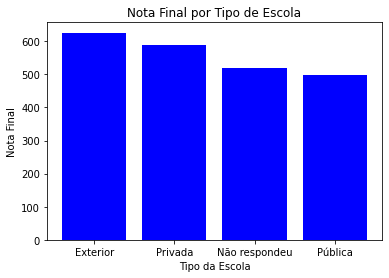

In [126]:
var_x = tipo_escola['TP_ESCOLA']
var_y = tipo_escola['NOTA_FINAL']

plt.bar(var_x, var_y,color='blue', width=0.8)
plt.xlabel('Tipo da Escola')
plt.ylabel('Nota Final')
plt.title('Nota Final por Tipo de Escola')
plt.show

In [132]:
media_por_estado = enem_2017.groupby('SG_UF_ESC').mean()

In [133]:
media_por_estado = media_por_estado.drop(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'], axis=1)

In [134]:
media_por_estado = media_por_estado.sort_values(by='NOTA_FINAL', ascending=False).reset_index()

In [135]:
media_por_estado

,SG_UF_ESC,NU_NOTA_REDACAO,NOTA_FINAL
0,SC,543.00,537.50
1,DF,558.50,536.50
2,RJ,557.50,534.50
3,MG,549.00,532.00
4,RS,545.00,531.00
5,SP,531.50,527.50
6,PR,523.50,524.50
7,ES,535.00,523.00
8,GO,535.50,517.50
9,SE,551.50,514.00


# O estado brasileiro com a maior média no ENEM 2017 foi:

In [140]:
melhor_media_estado = media_por_estado['NOTA_FINAL'].max()
melhor_media_estado

537.5

In [143]:
media_por_estado.loc[media_por_estado['NOTA_FINAL'] == melhor_media_estado]

,SG_UF_ESC,NU_NOTA_REDACAO,NOTA_FINAL
0,SC,543.0,537.5


# Fonte externa: Este arquivo contem dados sobre o IDHM e IDHM(Renda), ambos para 2017, por Estado e Região Geográfica.

In [ ]:
idh_estados = pd.read_excel('/content/drive/MyDrive/COLAB_DADOS/IDH_ESTADOS.xlsx')

In [ ]:
idh_estados

,SG_UF_ESC,REGIÃO,IDHM(2017),IDHM Renda(2017)
0,DF,CENTRO-OESTE,0.850,0.890
1,SP,SUDESTE,0.826,0.854
2,SC,SUL,0.808,0.866
3,RJ,SUDESTE,0.796,0.858
4,PR,SUL,0.792,0.843
5,MG,SUDESTE,0.787,0.875
6,RS,SUL,0.787,0.849
7,MT,CENTRO-OESTE,0.774,0.825
8,ES,SUDESTE,0.772,0.850
9,GO,CENTRO-OESTE,0.769,0.822


# Estas informações são então combinadas com os dados do ENEM:

In [ ]:
estados_e_regioes = pd.merge(media_por_estado, idh_estados, on='SG_UF_ESC', how = 'outer')

# O estado com a melhor média de notas, nesta edição do ENEM:

In [ ]:
melhor_estado = estados_e_regioes['NOTA_FINAL'].max()

In [ ]:
estados_e_regioes.loc[estados_e_regioes['NOTA_FINAL'] == melhor_estado]

,SG_UF_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NOTA_FINAL,REGIÃO,IDHM(2017),IDHM Renda(2017)
23,SC,528.0,534.0,520.5,548.0,543.0,537.5,SUL,0.808,0.866


In [ ]:
estados_e_regioes.sort_values(by='NOTA_FINAL', ascending=False).reset_index()

,index,SG_UF_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NOTA_FINAL,REGIÃO,IDHM(2017),IDHM Renda(2017)
0,23,SC,528.00,534.00,520.50,548.00,543.00,537.50,SUL,0.808,0.866
1,6,DF,523.00,533.00,523.50,532.50,558.50,536.50,CENTRO-OESTE,0.850,0.890
2,18,RJ,516.00,530.00,518.00,538.00,557.50,534.50,SUDESTE,0.796,0.858
3,10,MG,518.50,526.50,513.00,539.00,549.00,532.00,SUDESTE,0.787,0.875
4,22,RS,515.50,527.50,519.00,534.50,545.00,531.00,SUL,0.787,0.849
5,25,SP,513.50,526.00,519.50,534.50,531.50,527.50,SUDESTE,0.826,0.854
6,17,PR,517.00,526.50,514.50,527.50,523.50,524.50,SUL,0.792,0.843
7,7,ES,515.00,520.00,505.00,528.50,535.00,523.00,SUDESTE,0.772,0.850
8,8,GO,508.25,511.50,503.00,517.00,535.50,517.50,CENTRO-OESTE,0.769,0.822
9,24,SE,502.75,506.50,494.00,506.75,551.50,514.00,NORDESTE,0.702,0.799


In [ ]:
estados_e_regioes

,SG_UF_ESC,NU_NOTA_REDACAO,NOTA_FINAL,REGIÃO,IDHM(2017),IDHM Renda(2017)
0,AC,498.50,484.25,NORTE,0.719,0.821
1,AL,517.00,494.75,NORDESTE,0.683,0.783
2,AM,479.75,482.25,NORTE,0.733,0.786
3,AP,494.25,483.75,NORTE,0.740,0.820
4,BA,529.50,504.00,NORDESTE,0.714,0.812
5,CE,506.25,495.50,NORDESTE,0.735,0.818
6,DF,565.50,536.50,CENTRO-OESTE,0.850,0.890
7,ES,542.00,523.00,SUDESTE,0.772,0.850
8,GO,543.50,517.50,CENTRO-OESTE,0.769,0.822
9,MA,480.00,479.50,NORDESTE,0.687,0.764


In [ ]:
media_por_regiao = estados_e_regioes.groupby('REGIÃO').mean()

In [ ]:
media_por_regiao.sort_values(by='NOTA_FINAL', ascending=False).reset_index()

,REGIÃO,NU_NOTA_REDACAO,NOTA_FINAL,IDHM(2017),IDHM Renda(2017)
0,SUL,545.5,531.0,0.795667,0.852667
1,SUDESTE,550.5,529.0,0.795250,0.859250
2,CENTRO-OESTE,537.0,517.0,0.789750,0.846000
3,NORDESTE,524.5,502.0,0.710889,0.802889
4,NORTE,499.5,489.5,0.730000,0.797571


# Resultado por Região do Brasil
## Em ordem decrescente, observamos que, em média, a região Sul apresentou a melhor NOTA_FINAL, e a região Norte, a pior.

In [ ]:
media_por_estado = media_por_estado.dropna()
# O Estado da Escola foi escolhido, para comparar por escolas.

In [ ]:
media_por_estado.sort_values(by='NOTA_FINAL', ascending=False).reset_index()


,SG_UF_ESC,NU_NOTA_REDACAO,NOTA_FINAL
0,SC,551.00,537.50
1,DF,565.50,536.50
2,RJ,565.00,534.50
3,MG,557.00,532.00
4,RS,553.50,531.00
5,SP,538.50,527.50
6,PR,531.50,524.50
7,ES,542.00,523.00
8,GO,543.50,517.50
9,SE,557.50,514.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ea3a42810>,
      dtype=object)

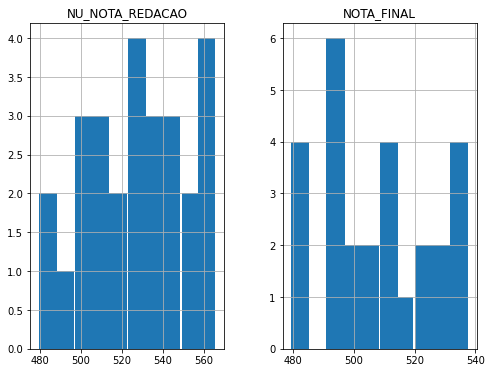

In [ ]:
media_por_estado.hist()

In [ ]:
media_por_cidade = enem_2017.groupby(['NO_MUNICIPIO_ESC']).mean()

In [ ]:
media_por_cidade = media_por_cidade.dropna()

In [ ]:
media_por_cidade.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 5276 entries, Abreu e Lima to Doutor Pedrinho
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NU_NOTA_REDACAO  5276 non-null   float16
 1   NOTA_FINAL       5276 non-null   float16
dtypes: float16(2)
memory usage: 201.2 KB


In [ ]:
media_por_cidade.sort_values(by='NOTA_FINAL', ascending=False).reset_index()

,NO_MUNICIPIO_ESC,NU_NOTA_REDACAO,NOTA_FINAL
0,Ouro,688.500,591.50
1,Valinhos,607.500,583.00
2,Roca Sales,627.500,582.00
3,Florestal,621.000,582.00
4,Presidente Lucena,600.000,580.00
...,...,...,...
5271,Miguel Leão,260.000,388.00
5272,Cunhataí,223.375,386.50
5273,Nova Aliança do Ivaí,270.000,386.50
5274,Vidal Ramos,0.000,338.25


In [ ]:
media_por_cidade.sample(10).reset_index()

,NO_MUNICIPIO_ESC,NU_NOTA_REDACAO,NOTA_FINAL
0,Rio do Pires,483.25,475.25
1,Aroeiras,537.50,484.50
2,Elisiário,464.50,498.50
3,Quipapá,479.25,459.75
4,Farol,568.50,533.00
5,Andaraí,448.25,469.25
6,Itaiçaba,503.50,492.00
7,Fundão,545.00,511.25
8,Bujari,461.50,472.75
9,Fronteira dos Vales,494.75,483.75


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ea3d82050>,
      dtype=object)

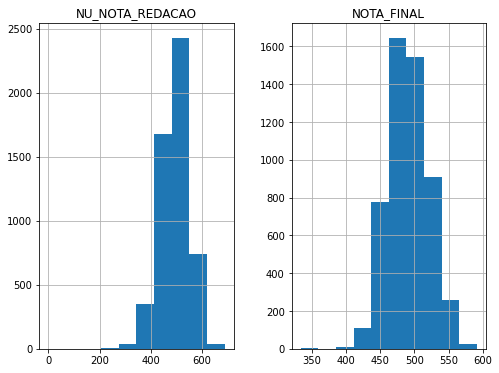

In [ ]:
media_por_cidade.hist()

In [ ]:
dez_melhores_cidades = media_por_cidade.nlargest(10, 'NOTA_FINAL')

In [ ]:
dez_melhores_cidades.reset_index()

,NO_MUNICIPIO_ESC,NU_NOTA_REDACAO,NOTA_FINAL
0,Ouro,688.5,591.5
1,Valinhos,607.5,583.0
2,Florestal,621.0,582.0
3,Roca Sales,627.5,582.0
4,Presidente Lucena,600.0,580.0
5,Florianópolis,600.0,579.0
6,União da Serra,671.5,577.5
7,Marinópolis,631.0,576.5
8,Santa Teresa,629.5,576.0
9,Nova Friburgo,642.0,575.0


In [ ]:
dez_melhores_cidades = media_por_cidade.sort_values(by='NOTA_FINAL', ascending=False).head(10)

In [ ]:
dez_melhores_cidades.reset_index()

,NO_MUNICIPIO_ESC,NU_NOTA_REDACAO,NOTA_FINAL
0,Ouro,688.5,591.5
1,Valinhos,607.5,583.0
2,Roca Sales,627.5,582.0
3,Florestal,621.0,582.0
4,Presidente Lucena,600.0,580.0
5,Florianópolis,600.0,579.0
6,União da Serra,671.5,577.5
7,Marinópolis,631.0,576.5
8,Santa Teresa,629.5,576.0
9,Nova Friburgo,642.0,575.0


In [ ]:
dez_piores_cidades = media_por_cidade.sort_values(by='NOTA_FINAL', ascending=True).head(10)

In [ ]:
dez_piores_cidades.reset_index()

,NO_MUNICIPIO_ESC,NU_NOTA_REDACAO,NOTA_FINAL
0,Bandeirante,0.000,333.50
1,Vidal Ramos,0.000,338.25
2,Nova Aliança do Ivaí,270.000,386.50
3,Cunhataí,223.375,386.50
4,Miguel Leão,260.000,388.00
5,Vitor Meireles,300.000,395.00
6,Ingazeira,313.250,400.50
7,Rio Rufino,360.000,402.00
8,Bonópolis,289.250,403.75
9,Santa Filomena do Maranhão,277.500,404.00
